In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from math import log2
import os
from scipy.optimize import root_scalar
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors


In [4]:
cmap = plt.get_cmap("plasma")

cmaps = [mcolors.to_hex(cmap(0.1)), mcolors.to_hex(cmap(1/3)), mcolors.to_hex(cmap(2/3)), mcolors.to_hex(cmap(0.9))]

In [5]:
cmaps

['#41049d', '#9c179e', '#ed7953', '#fcce25']

In [6]:
os.makedirs('results/figure', exist_ok=True)

fill_between = 25% ~ 75%

## std vs IPC

In [7]:
result_data = pd.read_csv('results/result.csv')

In [8]:
result_data

,d_bond,std,rho,seed,Ctot_deg1,Ctot_deg2,Ctot_deg3,Ctot_deg4,Ctot_deg5,Ctot
0,10,0.010,1.0,0,2.995623,3.075999,1.211946,0.734925,0.106430,8.124923
1,10,0.020,1.0,0,3.635417,4.860797,2.168813,0.649159,0.033434,11.347620
2,10,0.030,1.0,0,4.010240,5.897815,3.365290,0.591947,0.022525,13.887817
3,10,0.040,1.0,0,4.701550,8.304590,5.680230,0.550098,0.079385,19.315853
4,10,0.050,1.0,0,5.063204,9.832921,7.811294,0.614944,0.064621,23.386982
...,...,...,...,...,...,...,...,...,...,...
1705,100,0.600,1.0,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1706,100,0.700,1.0,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1707,100,0.800,1.0,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1708,100,0.900,1.0,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
result_data_describe = result_data[['d_bond', 'std', 'Ctot', 'Ctot_deg1', 'Ctot_deg2', 'Ctot_deg3', 'Ctot_deg4', 'Ctot_deg5']].groupby(['d_bond', 'std']).agg(
                                                                                    Ctot_median=pd.NamedAgg(column='Ctot', aggfunc='median'),
                                                                                    Ctot_25=pd.NamedAgg(column='Ctot', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    Ctot_75=pd.NamedAgg(column='Ctot', aggfunc=lambda x : np.percentile(x, 75)),
                                                                                    Ctot_deg1_median=pd.NamedAgg(column='Ctot_deg1', aggfunc='median'),
                                                                                    Ctot_deg2_median=pd.NamedAgg(column='Ctot_deg2', aggfunc='median'),
                                                                                    Ctot_deg3_median=pd.NamedAgg(column='Ctot_deg3', aggfunc='median'),
                                                                                    Ctot_deg4_median=pd.NamedAgg(column='Ctot_deg4', aggfunc='median'),
                                                                                    Ctot_deg5_median=pd.NamedAgg(column='Ctot_deg5', aggfunc='median'),
                                                                                    ).reset_index()

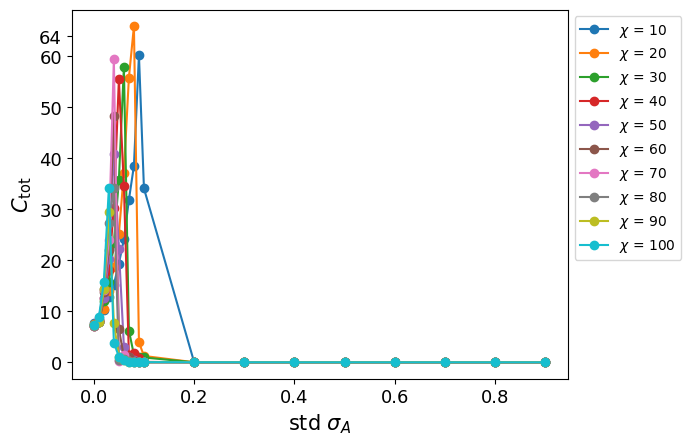

In [10]:
d_bonds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for d_bond in d_bonds :
# Compute various indicators from IPCs
    ipcs = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_median']
    plt.plot(stds, ipcs, label = f'$\chi$ = {d_bond}', marker = 'o')

    plt.xlabel(r'std $\sigma_A$', size = 15)
    plt.ylabel(r'$C_{\rm tot}$', size = 15)
    plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
    plt.xticks(size = 13)
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size = 13)

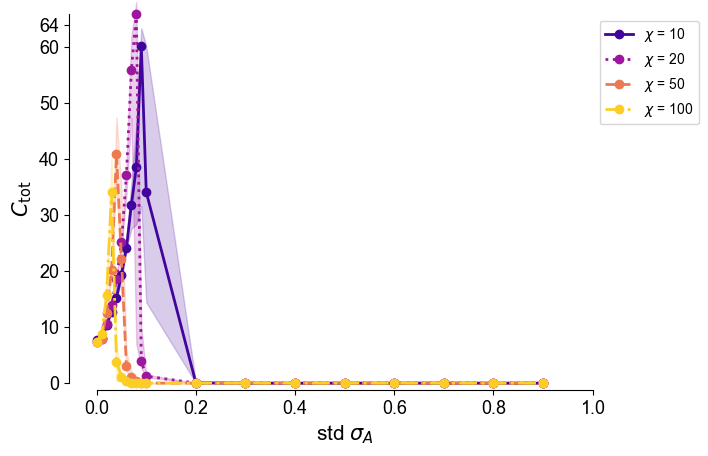

In [11]:
d_bonds = [10, 20, 50, 100]
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lines = {10:'-',20:':',50:'--',100:'-.'}


for i, d_bond in enumerate(d_bonds):
# Compute various indicators from IPCs
    ipcs_median = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_median']
    ipcs_25 = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_25']
    ipcs_75 = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_75']
    plt.plot(stds, ipcs_median, label = f'$\chi$ = {d_bond}', marker = 'o', linestyle=lines[d_bond], color=cmaps[i], clip_on=False,linewidth=2)
    plt.fill_between(stds, ipcs_25, ipcs_75, alpha=0.2, color=cmaps[i], clip_on=False)

plt.xlabel(r'std $\sigma_A$', size = 15)
plt.ylabel(r'$C_{\rm tot}$', size = 15)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.xticks(size = 13)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size = 13)
plt.xlim([0, 1])
plt.ylim([0.0, 66])

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=13)
plt.rcParams['font.sans-serif'] = ['Arial']

plt.savefig('results/figure/figure_5_a.pdf', bbox_inches='tight')

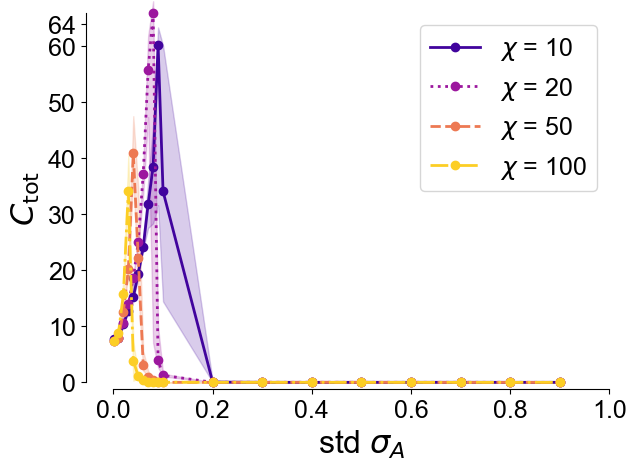

In [12]:
d_bonds = [10, 20, 50, 100]
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lines = {10:'-',20:':',50:'--',100:'-.'}


for i, d_bond in enumerate(d_bonds):
# Compute various indicators from IPCs
    ipcs_median = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_median']
    ipcs_25 = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_25']
    ipcs_75 = result_data_describe[result_data_describe['d_bond'] == d_bond]['Ctot_75']
    plt.plot(stds, ipcs_median, label = f'$\chi$ = {d_bond}', marker = 'o', linestyle=lines[d_bond], color=cmaps[i], clip_on=False,linewidth=2)
    plt.fill_between(stds, ipcs_25, ipcs_75, alpha=0.2, color=cmaps[i], clip_on=False)

plt.xlabel(r'std $\sigma_A$', size = 23)
plt.ylabel(r'$C_{\rm tot}$', size = 23)
plt.legend(loc = 'upper right', fontsize=18)
plt.xticks(size = 20)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size = 20)
plt.xlim([0, 1])
plt.ylim([0.0, 66])

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=18)
plt.rcParams['font.sans-serif'] = ['Arial']

In [13]:
result_data_describe[(result_data_describe['d_bond'] == 20)& (result_data_describe['std'] == 0.08)]

,d_bond,std,Ctot_median,Ctot_25,Ctot_75,Ctot_deg1_median,Ctot_deg2_median,Ctot_deg3_median,Ctot_deg4_median,Ctot_deg5_median
27,20,0.08,65.907191,7.022777,68.058051,8.713743,25.665074,22.572348,1.234057,0.839856


## IPC(degree)

20 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5
 0.6  0.7  0.8  0.9 ] 1349    2.996137
1350    3.062266
1351    4.008748
1352    4.901085
1353    5.803246
1354    7.122678
1355    8.743623
1356    9.496515
1357    1.487185
1358    0.501008
1359    0.000000
1360    0.000000
1361    0.000000
1362    0.000000
1363    0.000000
1364    0.000000
1365    0.001190
1366    0.000000
Name: Ctot_deg1, dtype: float64
20 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5
 0.6  0.7  0.8  0.9 ] 1349     6.150230
1350     7.227003
1351     9.971455
1352    13.202685
1353    16.979245
1354    24.210503
1355    31.851341
1356    37.849044
1357     2.961885
1358     1.004704
1359     0.000000
1360     0.000000
1361     0.001197
1362     0.000000
1363     0.002444
1364     0.001307
1365     0.001190
1366     0.000000
Name: Ctot_deg1, dtype: float64
20 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4  0.5
 0.6  0.7  0.8  0.9 ] 1349     7.317773
135

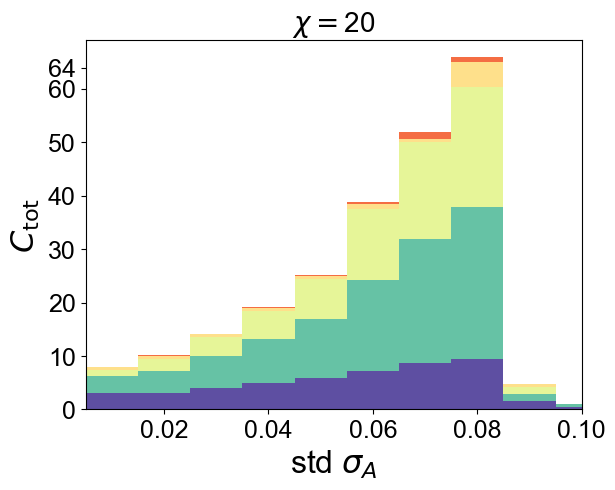

In [23]:
stds = np.array(stds)

stds_tmp = stds[stds > 0.001]
d_bond = 20
plt.figure()
bottom = np.zeros(stds_tmp.shape)
result_data_bond = result_data[result_data['d_bond'] == d_bond]
ipcs_deg = result_data_bond[(result_data_bond['seed'] == 7)]
ipcs_deg = ipcs_deg.sort_values(by='std')
ipcs_deg = ipcs_deg[ipcs_deg['std'] > 0.001]

for i in range(5):
	plt.bar(stds_tmp,ipcs_deg[f'Ctot_deg{i+1}'],width=0.01,bottom=bottom,label=(i+1),color=cm.Spectral_r((i)/5))
	bottom += ipcs_deg[f'Ctot_deg{i+1}']
	print(d_bond, stds_tmp, bottom)
plt.xlabel(r'std $\sigma_A$', size = 23)
plt.ylabel(r'$C_{\rm tot}$', size = 23)
# plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.xticks(size = 18)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size = 18)
plt.title(f'$\chi = ${d_bond}', size=20)
plt.xlim([0.005, 0.1])

plt.savefig('results/figure/figure_ipc.pdf', bbox_inches='tight')


In [24]:
d_bond = 20
result_data_bond = result_data[result_data['d_bond'] == d_bond]

ipcs_mps = result_data_bond[(result_data_bond['seed'] == 7) & (result_data_bond['std'] == 0.08)]
ipcs_mps

result_data_esn = pd.read_csv('results/result_esn.csv')

input_scale = 0.9

# データをフィルタリング
result_data_esn = result_data_esn[(result_data_esn['seed'] == input_scale)]

result_data_esn



,seed,Ctot_deg1,Ctot_deg2,Ctot_deg3,Ctot_deg4,Ctot_deg5,Ctot
8,0.9,7.165592,16.951793,22.100325,13.868678,5.058904,65.145291


In [25]:
result_data_esn

,seed,Ctot_deg1,Ctot_deg2,Ctot_deg3,Ctot_deg4,Ctot_deg5,Ctot
8,0.9,7.165592,16.951793,22.100325,13.868678,5.058904,65.145291


0
0.01


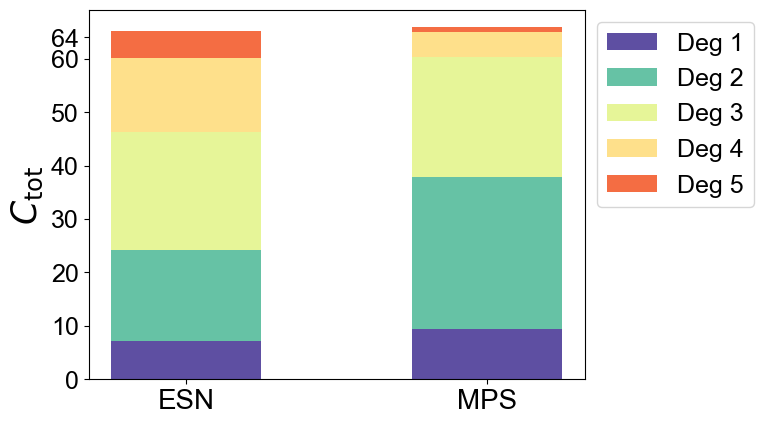

In [26]:

# 入力スケールの配列が必要なため、input_scaleをリストとして定義

plt.figure()

x_positions = [0, 0.01]  # 横に並べるためのオフセット


# 各input_scaleの積み上げ棒グラフ
for idx, (result_data_bond, x_pos) in enumerate(zip([result_data_esn, ipcs_mps], x_positions)):
    bottom = np.zeros(len(result_data_bond))
    print(x_pos)
    for i in range(5):
        plt.bar(
            [x_pos],
            result_data_bond[f'Ctot_deg{i+1}'],  # 平均値をプロット
            width=0.005,
            bottom=bottom,  # 平均値の積み上げ
            label=f'Deg {i+1}' if idx == 0 else None,  # ラベルは1回のみ
            color=cm.Spectral_r(i / 5),
        )
        bottom += result_data_bond[f'Ctot_deg{i+1}']

# グラフの装飾
plt.ylabel(r'$C_{\rm tot}$', size=25)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(x_positions, labels=['ESN', 'MPS'], size=20)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size=18)

# plt.xlim([-0.005, 0.005])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=18)

# 保存
plt.savefig('results/figure/figure_ipc_stacked_bar.pdf', bbox_inches='tight')


10 0.01 1     2.998710
2     3.441263
3     3.987742
4     4.286097
5     4.937879
6     5.368738
7     6.068957
8     6.581771
9     7.296759
10    5.731068
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
Name: Ctot_deg1_median, dtype: float64
10 0.02 1      6.199717
2      8.089254
3      9.528480
4     10.967633
5     13.423003
6     15.789076
7     19.607602
8     22.186976
9     26.007897
10    18.752217
11     0.022505
12     0.000000
13     0.000000
14     0.001289
15     0.003541
16     0.004736
17     0.003714
18     0.003700
Name: Ctot_deg1_median, dtype: float64
10 0.03 1      7.370545
2      9.949171
3     12.387109
4     14.853776
5     18.750931
6     23.360430
7     30.525131
8     36.416149
9     48.810971
10    27.142818
11     0.027235
12     0.000000
13     0.000000
14     0.001289
15     0.005991
16     0.004736
17     0.003714
18     0.004916
Name: Ctot_deg1_median, dtype: float64
10 0.04 1    

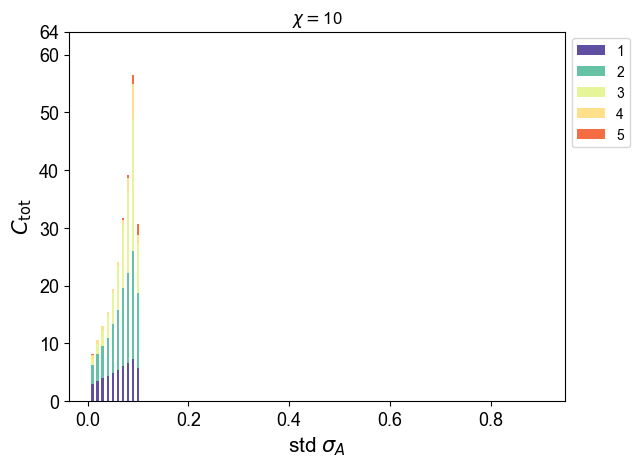

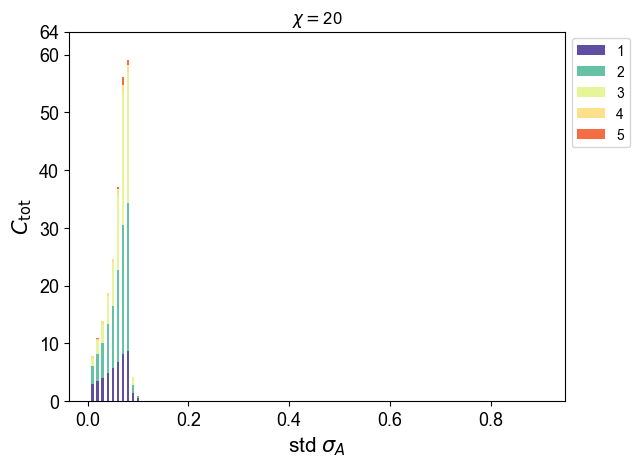

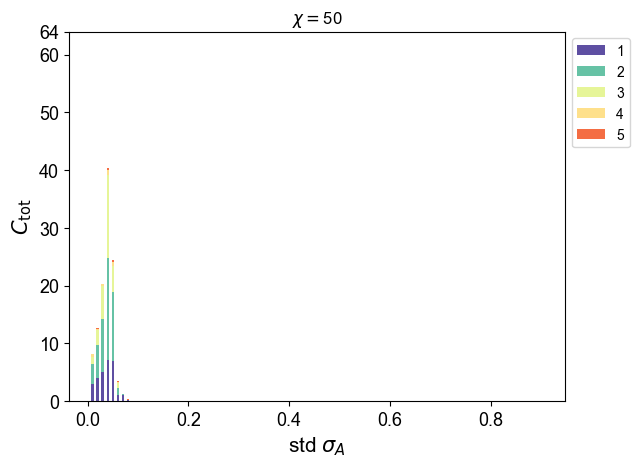

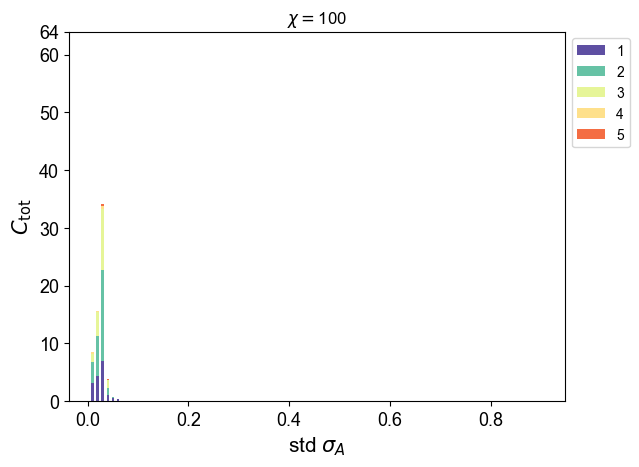

In [30]:
stds = np.array(stds)
for d_bond in d_bonds:
	plt.figure()
	stds_tmp = stds[stds > 0.001]
	bottom = np.zeros(stds_tmp.shape)
	ipcs_deg = result_data_describe[result_data_describe['d_bond'] == d_bond]
	ipcs_deg = ipcs_deg[ipcs_deg['std'] > 0.001]

	for i in range(5):
		plt.bar(stds_tmp,ipcs_deg[f'Ctot_deg{i+1}_median'],width=0.005,bottom=bottom,label=(i+1),color=cm.Spectral_r((i)/5))
		bottom += ipcs_deg[f'Ctot_deg{i+1}_median']
		print(d_bond, stds_tmp[i], bottom)
	plt.xlabel(r'std $\sigma_A$', size = 15)
	plt.ylabel(r'$C_{\rm tot}$', size = 15)
	plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
	plt.xticks(size = 13)
	plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size = 13)
	plt.title(f'$\chi = ${d_bond}')


## Entanglement Entropy vs IPC

In [33]:
df_entropy = pd.read_csv('results/entropy.csv')

In [34]:
result_data = result_data.rename({'d_bond' : 'bond'}, axis=1)

In [35]:
df_merge = pd.merge(df_entropy, result_data, how='inner', on=['bond', 'std', 'seed'])

In [36]:
df_merge

,bond,std,seed,entropy,rho,Ctot_deg1,Ctot_deg2,Ctot_deg3,Ctot_deg4,Ctot_deg5,Ctot
0,10,0.001,0,1.336502e-08,1.0,1.998898,1.934032,1.618245,1.401613,0.561296,7.514084
1,10,0.010,0,8.879100e-05,1.0,2.995623,3.075999,1.211946,0.734925,0.106430,8.124923
2,10,0.020,0,1.287329e-03,1.0,3.635417,4.860797,2.168813,0.649159,0.033434,11.347620
3,10,0.030,0,6.649187e-03,1.0,4.010240,5.897815,3.365290,0.591947,0.022525,13.887817
4,10,0.040,0,2.259912e-02,1.0,4.701550,8.304590,5.680230,0.550098,0.079385,19.315853
...,...,...,...,...,...,...,...,...,...,...,...
1135,100,0.500,5,3.408579e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1136,100,0.600,5,3.406199e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1137,100,0.700,5,3.403342e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1138,100,0.800,5,3.400656e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
df_merge_describe = df_merge[['bond', 'std', 'Ctot', 'entropy']].groupby(['bond', 'std']).agg(
                                                                                    Ctot_median=pd.NamedAgg(column='Ctot', aggfunc='median'),
                                                                                    Ctot_25=pd.NamedAgg(column='Ctot', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    Ctot_75=pd.NamedAgg(column='Ctot', aggfunc=lambda x : np.percentile(x, 75)),
                                                                                    entropy_median=pd.NamedAgg(column='entropy', aggfunc='median'),
                                                                                    entropy_25=pd.NamedAgg(column='entropy', aggfunc=lambda x : np.percentile(x, 25)),
                                                                                    entropy_75=pd.NamedAgg(column='entropy', aggfunc=lambda x : np.percentile(x, 75))
                                                                                    ).reset_index()

([<matplotlib.axis.YTick at 0x7f11090f1600>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 64, '64')])

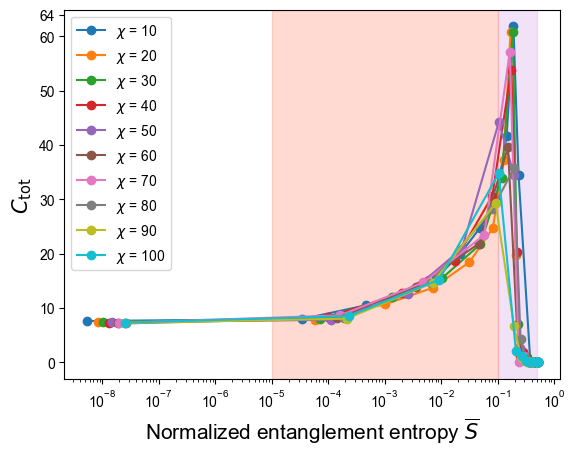

In [40]:
rho = 1
d_bonds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for d_bond in d_bonds:
    entropy_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_median']
    Ctot_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_median']
    plt.plot(entropy_median / log2(d_bond) , Ctot_median, label = f'$\chi$ = {d_bond}', marker = 'o')
plt.xscale('log')
plt.legend()
plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)

plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel(r'$C_{\rm tot}$', size = 15)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64])

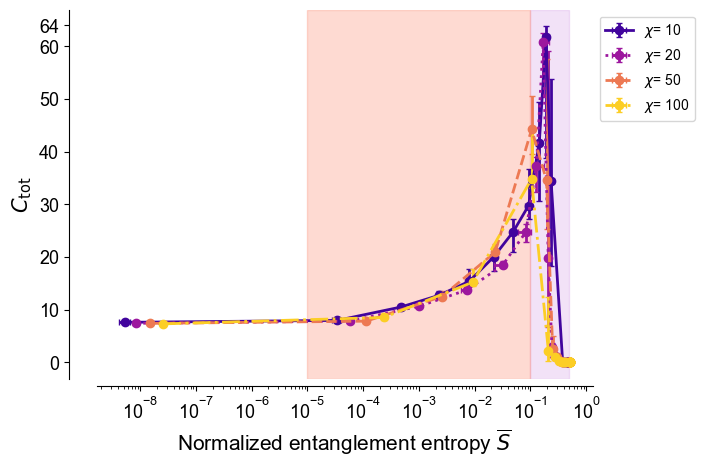

In [41]:
rho = 1
d_bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}
for i, d_bond in enumerate(d_bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_75']
    Ctot_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_median']
    Ctot_25 = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_25']
    Ctot_75 = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_75']
    plt.errorbar(entropy_median/log2(d_bond), Ctot_median, label = f'$\chi$= {d_bond}', marker = 'o',linestyle=lines[d_bond],
                xerr=np.stack([(entropy_median - entropy_25) / log2(d_bond), (entropy_75 - entropy_median) / log2(d_bond)]),
                yerr=np.stack([Ctot_median - Ctot_25, Ctot_75 - Ctot_median]), capsize=2, color=cmaps[i], linewidth=2)
plt.xscale('log')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=13)
plt.rcParams['font.sans-serif'] = ['Arial']

plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=15)
plt.ylabel(r'$C_{\rm tot}$', size = 15)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64])

plt.savefig('results/figure/figure_9_d.pdf', bbox_inches='tight')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.20000000000000004, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5000000000000001, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6')])

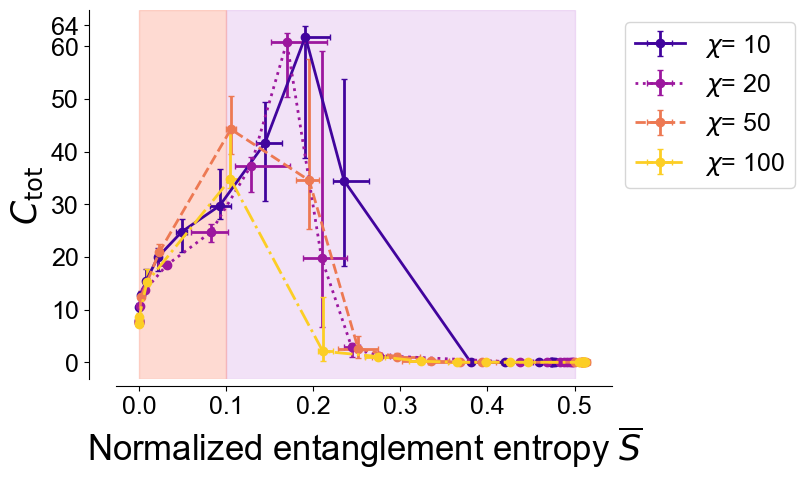

In [21]:
rho = 1
d_bonds = [10, 20, 50, 100]
lines = {10:'-',20:':',50:'--',100:'-.'}
for i, d_bond in enumerate(d_bonds):
    entropy_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_median']
    entropy_25 = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_25']
    entropy_75 = df_merge_describe[df_merge_describe['bond'] == d_bond]['entropy_75']
    Ctot_median = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_median']
    Ctot_25 = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_25']
    Ctot_75 = df_merge_describe[df_merge_describe['bond'] == d_bond]['Ctot_75']
    plt.errorbar(entropy_median/log2(d_bond), Ctot_median, label = f'$\chi$= {d_bond}', marker = 'o',linestyle=lines[d_bond],
                xerr=np.stack([(entropy_median - entropy_25) / log2(d_bond), (entropy_75 - entropy_median) / log2(d_bond)]),
                yerr=np.stack([Ctot_median - Ctot_25, Ctot_75 - Ctot_median]), capsize=2, color=cmaps[i], linewidth=2)
# plt.xscale('log')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1), fontsize=18)
plt.axvspan(0.1, 0.5, color='#D49FE7', alpha=0.3)
plt.axvspan(0.00001, 0.1, color='#FD866C', alpha=0.3)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=13)
plt.rcParams['font.sans-serif'] = ['Arial']

plt.xlabel('Normalized entanglement entropy $\overline{S}$', size=25)
plt.ylabel(r'$C_{\rm tot}$', size = 25)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 64], size=18)
plt.xticks(size=18)

# plt.savefig('results/figure/figure_9_d.pdf', bbox_inches='tight')

# 2D-map

In [42]:
# load order parameter
save_array = np.load('../order_parameter/results/Order_parameter_64.npz')
X1 = save_array['X']
Y1 = save_array['Y']
MFv64 = save_array['Mfv64']

/tmp/ipykernel_334647/845741503.py:28: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in criticalv.collections:


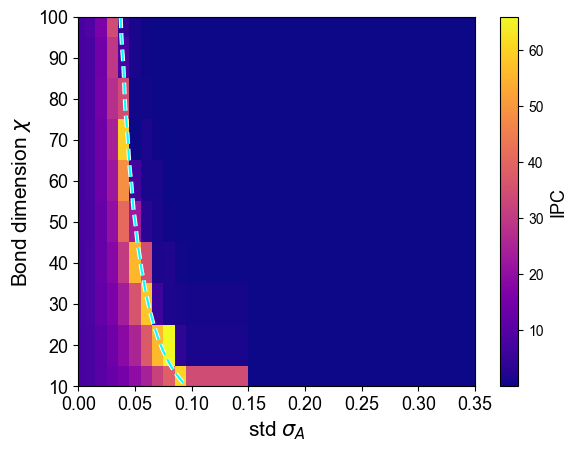

In [11]:
import matplotlib.patheffects as pe
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]
d_bonds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

X=np.zeros((len(d_bonds),len(stds)))
Y=np.zeros((len(d_bonds),len(stds)))
Z=np.zeros((len(d_bonds),len(stds)))

rho = 1
N = 10

for i, d_bond in enumerate(d_bonds):
    ipcs_median = result_data_describe[(result_data_describe['d_bond'] == d_bond) & (result_data_describe['std'].isin(stds))]['Ctot_median']
    X[i,:]=(np.array(stds))
    Y[i,:]=d_bond
    Z[i,:]=ipcs_median

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z, cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=15)
ax.set_ylabel('Bond dimension $\chi$', size=15)
cb.ax.set_ylabel('IPC', size=13)

# plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='cyan')

for collection in criticalv.collections:
    collection.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])

plt.ylim([10,100])
plt.xlim([0,0.35])
plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=13)

plt.savefig('results/figure/figure_5_a.pdf', bbox_inches='tight')

/tmp/ipykernel_334647/3307722547.py:32: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in criticalv.collections:


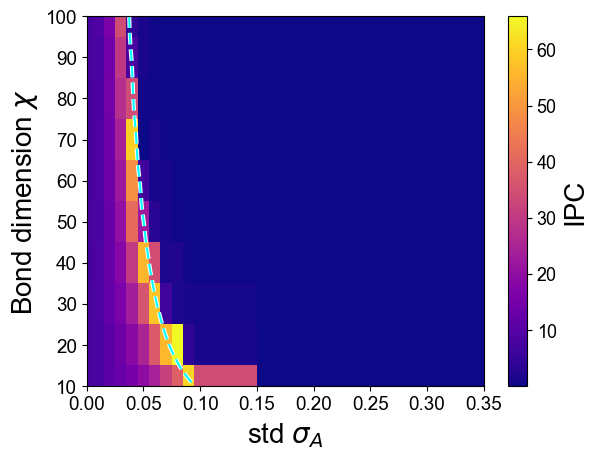

In [27]:
import matplotlib.patheffects as pe

plt.rcParams['font.size'] = 13

stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]
d_bonds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

X=np.zeros((len(d_bonds),len(stds)))
Y=np.zeros((len(d_bonds),len(stds)))
Z=np.zeros((len(d_bonds),len(stds)))

rho = 1
N = 10

for i, d_bond in enumerate(d_bonds):
    ipcs_median = result_data_describe[(result_data_describe['d_bond'] == d_bond) & (result_data_describe['std'].isin(stds))]['Ctot_median']
    X[i,:]=(np.array(stds))
    Y[i,:]=d_bond
    Z[i,:]=ipcs_median

fig,ax=plt.subplots()
mesh=ax.pcolormesh(X,Y,Z, cmap='plasma')
cb=fig.colorbar(mesh)
ax.set_xlabel('std $\sigma_A$', size=20)
ax.set_ylabel('Bond dimension $\chi$', size=20)
cb.ax.set_ylabel('IPC', size=20)
cb.ax.yaxis.label.set_fontsize(20)

# # plot line
criticalv=ax.contour(X1,Y1,MFv64,[0.125],linestyles='dashed',colors='cyan')

for collection in criticalv.collections:
    collection.set_path_effects([pe.Stroke(linewidth=3, foreground='white'), pe.Normal()])

plt.ylim([10,100])
plt.xlim([0,0.35])
plt.rcParams['font.sans-serif'] = ['Arial']
plt.tick_params(labelsize=13.6)

plt.savefig('results/figure/shuron_fig2.pdf', bbox_inches='tight')

In [25]:
import cupy as cp
import numpy as np
from mps_evolved import Evolution_MPS
import argparse
import tensornetwork as tn
from tqdm import tqdm
import logging
from logging import getLogger, Formatter, StreamHandler
from utils.information_processing_capacity import single_input_ipc
import pickle
import os
import csv


##### Parameters for mps #####
N = 64      # Number of nodes
Two = 10000 # Washout time
T = int(1e5)
zeta = 2*np.random.rand(Two+T)-1
rho = 1

# Parameters for IPC
poly = 'legendre'
distr = 'uniform'
degdelays = [[1,2000],[2,300],[3,50],[4,30],[5,15]]
# Class for IPC
ipc = single_input_ipc(zeta,Two,degdelays,poly=poly,distr=distr,zerobased=True)

gpu_id = 0
cp.cuda.Device(gpu_id).use()

# Directory
pkldir = 'ipc/pkl'


d_bond = 20
std = 0.08
seed = 7
iota = 0.1


path = '%s/state_%d_%d_%5.3f_%5.3f_%5.3f_%d'%(pkldir,N,d_bond,std,rho,iota,seed)
ipc.load_config(path)



/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
th_scale = 1.2
delays,mf1d = ipc.mf1d(path,th_scale=th_scale)
print('delay',delays)
print('1st-order capacties',mf1d)

<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]
delay [   0    1    2 ... 1998 1999 2000]
1st-order capacties [0, 0.9999765071585623, 0.9999459749514406, 0.9995369162948881, 0.995988059239112, 0.9822137977445546, 0.9441658388729623, 0.8779178665924914, 0.5888164076106637, 0.2738311135604, 0.2178546152132796, 0.16701187512507815, 0.13901303045990673, 0.10826330081614584, 0.09010966441362199, 0.0847202630504771, 0.07848280238937227, 0.07309607524163185, 0.0687406628788354, 0.06236430427399068, 0.05608488801448898, 0.05242665076726583, 0.048142236178464026, 0.04451749918840005, 0.04077665264885939, 0.037292086124648016, 0.03482738016266922, 0.03260629051259218, 0.029393105464397554, 0.026731641048297436, 0.024684264487916826, 0.022467640079344785, 0.020910382334089726, 0.01877999969247625, 0.017401068203320477, 0.01645016652208491, 0.0160997032979716, 0.01484072456422348, 0.013696005088049107, 0.012657544978855005, 0.011774905105278262, 0.010810949722790657, 0.010181993960060733, 0.009441983043

In [27]:
cmaps = ['#C186E7', '#38BFC2', '#7FC39C', '#F99D9D']

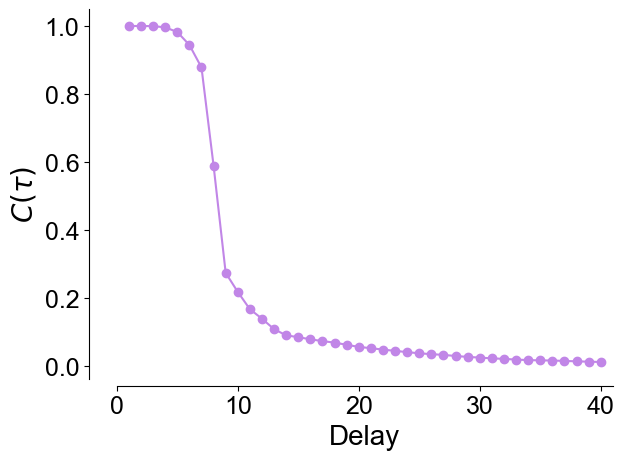

In [28]:
plt.plot(delays[1:41], mf1d[1:41], marker = 'o', color=cmaps[0])
plt.xlim([0, 41])

plt.rcParams['font.sans-serif'] = ['Arial']

plt.xlabel('Delay', size=20)
plt.ylabel(r'$C(\tau)$', size=20)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_position(('outward', 5))
plt.gca().spines['left'].set_position(('outward', 20))
plt.tick_params(labelsize=18)

plt.savefig('results/figure/figure_mc.pdf', bbox_inches='tight')

In [29]:
import numpy as np
np.savez('mc.npz', delays=delays, mf1d=mf1d)